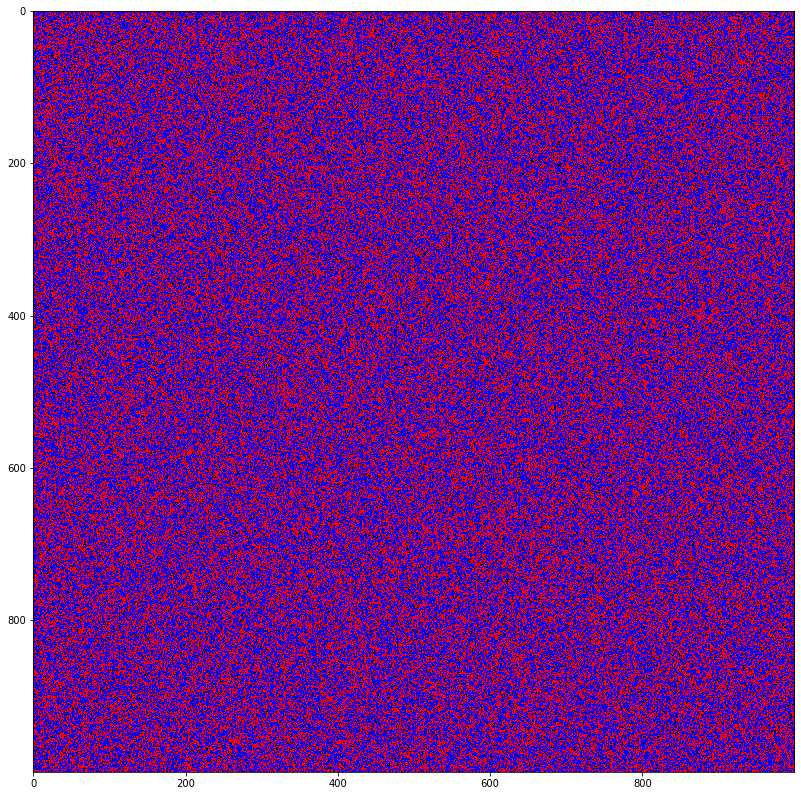

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from random import choice
from datetime import datetime
from time import time
from os.path import exists
from os import mkdir

N=1000
BLUE=RED=int(0.45 * N * N)
EMPTY=int(0.1 * N * N)
COLORMAP=ListedColormap([(0, 0, 0), (1, 0, 0), (0, 0, 1)])
NEIGHBOURS=4
OUTPUT_ITERATIONS=20000
EMPTY_VALUE=-1

matrix = np.concatenate((np.full(shape=EMPTY, fill_value=EMPTY_VALUE), np.zeros(RED), np.ones(BLUE)))
rng = np.random.default_rng(seed = int(time()))
rng.shuffle(matrix)
matrix = np.reshape(matrix, (N, N)).astype(int)

plt.figure(figsize=(14,14))
plt.imshow(matrix, cmap=COLORMAP)

In [260]:
def sub(mat, i, j):
    return mat[i-1 if i > 0 else 0 : i+2 if i < N-1 else N, 
               j-1 if j > 0 else 0 : j+2 if j < N-1 else N]

In [261]:
def count_neighbours(i, j):
    if matrix[i, j] != EMPTY_VALUE:
        return np.count_nonzero(sub(matrix, i, j) == matrix[i,j]) - 1
    return EMPTY_VALUE

In [262]:
neighbours_map = np.zeros((N, N), dtype='int')
for i, j in np.ndindex(N, N):
    neighbours_map[i, j] = count_neighbours(i, j)
neighbours_map

array([[ 0,  3, -1, ...,  2,  3,  2],
       [ 4,  6,  5, ...,  1, -1,  4],
       [ 5,  7,  4, ...,  3,  4,  3],
       ...,
       [ 2,  3,  3, ...,  3,  2,  3],
       [ 3,  6,  4, ...,  2,  4,  2],
       [ 3,  5,  3, ...,  3,  2,  1]])

In [263]:
def swap(random_unhappy, random_empty):
    unhappy_i, unhappy_j = random_unhappy
    empty_i, empty_j = random_empty
    matrix[unhappy_i, unhappy_j], matrix[empty_i, empty_j] = matrix[empty_i, empty_j], matrix[unhappy_i, unhappy_j]
    
    submatrix_unhappy = sub(neighbours_map, unhappy_i, unhappy_j)
    submatrix_unhappy[np.nonzero(sub(matrix, unhappy_i, unhappy_j) == matrix[empty_i, empty_j])] -= 1
    neighbours_map[unhappy_i, unhappy_j] = EMPTY_VALUE

    submatrix_empty = sub(neighbours_map, empty_i, empty_j)
    submatrix_empty[np.nonzero(sub(matrix, empty_i, empty_j) == matrix[empty_i, empty_j])] += 1
    neighbours_map[empty_i, empty_j] = count_neighbours(empty_i, empty_j)


In [264]:
def save_image(timestamp, i, matrix):
    dirname = f'/result_{timestamp}/'
    path = dirname + f'iter_{i}.png'
    if not exists(dirname):
        mkdir(dirname)
    plt.imsave(f'/result_{timestamp}/iter_{i}.png', matrix, cmap=COLORMAP)

In [ ]:
timestamp = datetime.now().strftime('%d_%m_%Y__%H_%M_%S')
i = 0
while True:
    if (i % OUTPUT_ITERATIONS == 0):
        save_image(timestamp, i, matrix)
    unhappy = np.argwhere((neighbours_map >= 0) & (neighbours_map < NEIGHBOURS))
    if unhappy.size:
        random_unhappy = choice(unhappy)
        random_empty = choice(np.argwhere(matrix == EMPTY_VALUE))
        swap(random_unhappy, random_empty)
        i += 1
    else:
        print(f'Все клетки счастливы после шага {i}')
        save_image(timestamp, i, matrix)
        break

plt.figure(figsize=(14,14))
plt.imshow(matrix, cmap=COLORMAP)

In [ ]:
neighbours_map

In [ ]:
real_neighbours_map = np.zeros((N, N), dtype='int')
for i, j in np.ndindex(N, N):
    real_neighbours_map[i, j] = count_neighbours(i, j)
(real_neighbours_map == neighbours_map).all()